In [1]:
import pandas as pd
import nltk
import spacy
import sys
import os

C:\Users\mathe\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Problem: Company Description Analysis for Marketing Segmentation

Dataset: The dataset contains company IDs and their corresponding descriptions. The goal is to analyze the company descriptions and identify meaningful clusters of companies based on their business profiles. This analysis will help in customer segmentation and targeted marketing strategies.

## Hypothesis:

Company segmentation based on their description involves categorizing companies into distinct groups or segments based on the content and language used in their descriptions. The hypothesis proposes that utilizing company description as a segmentation criterion can yield several benefits:

## Approach:

The objective of this project is to develop a model that can segment a set of companies based on their specific description. The model will be trained using the company description dataset, utilizing NLP techniques and clustering analysis to identify meaningful patterns and groupings of companies.

* Data Preprocessing: The company descriptions will undergo preprocessing steps such as removing non-printable characters, line breaks, duplicated spaces, and leading/trailing spaces. Additionally, text normalization techniques will be applied, including removing stop words and lemmatizing the tokens, using tools like Spacy.

* Feature Engineering: The preprocessed company descriptions will be transformed into meaningful features that capture the essence of each description. These features may include word frequencies, word2vec scores, token counts, and other relevant textual attributes.

* Clustering Analysis: The transformed features will be used to train a clustering model, such as K-means, to identify distinct groups or clusters of companies. The optimal number of clusters will be determined using techniques like the elbow method or silhouette analysis.

* Model Delivery: The final deliverable will be the trained clustering model

## Conclusion:

By leveraging NLP techniques and clustering analysis, this project aims to deliver a model that can segment a set of companies based on their description. The model will analyze the company descriptions, identify distinct clusters, and match user preferences with the relevant clusters. This approach empowers users to find companies that align with their specific needs and facilitates more targeted and personalized recommendations.

The cell below allows the automatic reload of the module when their code changes.

In [2]:
%load_ext autoreload
%autoreload 2

Update the following constants to work in your enviroment

In [3]:
PROJECT_BASE_PATH = 'C:\\projects\\a3_test'
DATA_BASE_PATH = os.path.join(PROJECT_BASE_PATH, 'data')
SPACY_MODEL = 'en_core_web_md'

In [4]:
def get_spacy_model(new_model: bool = False, **kwargs):
    """
    !IMPORTANT!
    Use this function to get the loaded spacy model or load a
    new one
    """
    
    if new_model:
        return spacy.load(SPACY_MODEL, **kwargs)
    
    if 'spacy_model' in globals():
        return globals()['spacy_model']
    else:
        spacy_model = spacy.load(SPACY_MODEL)
        
        return spacy_model

In [5]:
spacy_model = get_spacy_model()

In [6]:
sys.path.append(PROJECT_BASE_PATH)

In [7]:
## Defining our custom functions

from src.preprocessing.text import normalize_text, remove_noisy_texts, add_textual_statistics
from src.preprocessing.reports import duplicated_report, missing_values_report
from src.analysis.companies import detect_company_name
from src.utils import printmd

## Getting started 🚀

In this initial phase of our Natural Language Processing (NLP) exploratory data analysis (EDA), our goal is to gain a comprehensive understanding of the dataset at hand. We will begin by loading the data and performing a preliminary analysis to establish a solid foundation for our subsequent NLP investigations.

### Data Loading and Overview 📊🔍

Firstly, we will load the dataset and examine its structure and content. This step involves understanding the columns and their respective data types, as well as the number of entries available. By doing so, we can ensure that we have a clear picture of the data we are working with.

In [8]:
filepath = os.path.join(DATA_BASE_PATH, 'raw', 'id_desc.csv')

data = pd.read_csv(filepath)

In [9]:
data.sample(5)

,id,desc
2683,abe9ca4a-ac4d-4c5a-86e7-be40434f6870,Caption Health will use this funding to scale ...
1893,67c62c64-5cc4-42ec-84fe-f847a140c797,"Our company, Trendful, is building a multi-cha..."
1260,2fd0ef84-4f20-4858-8405-c74dbcedac88,Measured helps brands grow by measuring increm...
1918,6a0955fd-9aec-41cd-9823-0f6fad7a57db,ThisFish’s mission is to improve profits and s...
415,ea57f20f-0ead-40fd-8d32-84bbe8e3093e,Clinical Research IO is a health tech company ...


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3617 entries, 0 to 3616
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      3617 non-null   object
 1   desc    3553 non-null   object
dtypes: object(2)
memory usage: 56.6+ KB


### Data Exploration 📈

Next, we will delve into exploring the textual nature of the dataset. Since this is an NLP-focused EDA, we won't have traditional statistical metrics at our disposal. Instead, our focus will be on understanding the characteristics of the textual data, such as the distribution of text lengths, identifying any missing values, and investigating the presence of duplicates.

### Missing Values 🚫

It's essential to identify and handle missing values appropriately. We will explore the 'desc' column to determine the presence and extent of missing data. Understanding the extent of missing values will guide our preprocessing decisions and ensure the integrity of subsequent analyses.

In [11]:
columns = ['id', 'desc']

missing_values_report(data, columns)

### Missing Values Report

- **id**: 0 missing values (0.00%)
- **desc**: 64 missing values (1.77%)


In [12]:
cleaned_data = data[~data['desc'].isna()]

In [13]:
columns = ['id', 'desc']

missing_values_report(cleaned_data, columns)

### Missing Values Report

- **id**: 0 missing values (0.00%)
- **desc**: 0 missing values (0.00%)


#### Text Normalization step ✨

Text normalization is a crucial step in natural language processing (NLP) tasks, as it helps to standardize and clean text data, making it easier to analyze and process.

 * The normalize_text function aims to perform text normalization operations on the specified columns of a pandas DataFrame.
 * The steps involved in the text normalization process are as follows:
     * Removing non-printable characters: Non-printable characters, such as control characters or special symbols, are removed from the text data. This step ensures that only printable ASCII characters are retained, making the text more readable and consistent.
     * Replacing line breaks: Line breaks, represented by '\r' and '\n', are replaced with a space (' '). This step ensures that the text remains in a single line, as line breaks may not be meaningful in certain NLP analyses.
     * Removing duplicated spaces: Any duplicated spaces within the text are reduced to a single space. This helps in standardizing the whitespace and simplifying the text structure.
     * Stripping leading/trailing spaces: Leading and trailing spaces in the text are removed. This step ensures that there are no unnecessary spaces at the beginning or end of the text, which could affect subsequent analyses or comparisons.


In [14]:
normalized_data = normalize_text(cleaned_data, columns=['id', 'desc'])

In [15]:
normalized_data.sample(2).to_dict(orient='records')

[{'id': '24b73ee5-df80-4a5a-9ebc-0275ea07b773',
  'desc': 'Redsalud is a private health organization that delivers healthcare services, insurance, imaging, laboratory testing and surgeries.'},
 {'id': '1d680735-bbe0-4213-9613-d15fac7b69c4',
  'desc': 'Pimloc is a British tech company setup at the end of 2016, which provides specialist deep learningservices for video security and data privacy applications. It has developed a world leadingplatform for the ingestion, detection, classification, and protection of image and video content.This platform powers two products across the private andpublic sector: 1) Pholio: A system foridentifying specialist visual content in large collections and streams and 2) Secure Redact: Asystem for anonymising sensitive content in large scale video.Read More'}]

### Duplicates 📑

Duplicate records can introduce bias and distort our analyses. We will perform a thorough check for duplicate entries within the dataset, aiming to identify and eliminate any redundant data. This step is crucial for maintaining data quality and accuracy throughout our NLP analysis.

In [16]:
columns = ['id', 'desc']

duplicated_report(normalized_data, columns)

### Duplicates Report

- **id**: 0 duplicates (0.00%)
- **desc**: 101 duplicates (2.84%)


In [17]:
duplicates = normalized_data[normalized_data.duplicated(subset='desc')]

In [18]:
duplicates.sample(3).to_dict(orient='records')

[{'id': '0f108bb1-5f38-4a16-ac96-9119893ef134',
  'desc': 'Senseye was created to shape the future of computing. Here at Senseye, it is our core mission to bring the most intelligent and creative minds together in order to shape our aspirations for the future. Our goal is to create an emotional resonance between humans and computers that mirrors the intimate resonance that exists between people.Foundedwith the vision of shaping the future of computing, and that is exactly what we are doing. We have always been inspired by the words President John F. Kennedy spoke in September 1962, when he announced that the United States would seek to send a man to the moon. In the spirit of exploring new worlds, our companys purpose is to work on moonshots much like the bold, inspiring goal to land a man on the moon, set more than 50 years ago. A moonshot is defined as a project that addresses an enormous problem, proposes a radical solution and uses breakthrough technology.Senseye uses novel non-inv

Lets remove the duplicated data

In [19]:
deduplicated_data = normalized_data[~normalized_data['desc'].duplicated()]

In [20]:
columns = ['id', 'desc']

duplicated_report(deduplicated_data, columns)

### Duplicates Report

- **id**: 0 duplicates (0.00%)
- **desc**: 0 duplicates (0.00%)


#### Noisy text analysis

So, after cleaning, doing basic normalization and deduplication on the text and doing some checkings it was possible to see that some samples of the data has at end of the descrioption the text **Read More**. This is can considered a noise to our dataset.

There are some patterns that can occurs on this kind of data, we aren't able to determine all of them, but for this initial analysis, lets determine some.

In [21]:
patterns = ['read more', 'click here', 'continue reading the full article']

In [22]:
denoised_data = remove_noisy_texts(deduplicated_data, patterns=patterns, columns=['desc'], show_count=True)

Noisy pattern counts:
desc    2286
dtype: int64


By conducting these initial exploratory steps, we will establish a solid foundation for our NLP EDA. This process will enable us to gain a deeper understanding of the dataset's structure, identify any data quality issues, and lay the groundwork for subsequent NLP techniques and analyses.

### Text Length Analysis 📊

We will analyze the length of the text in the 'desc' column to gain insights into the structure and complexity of the company descriptions. This analysis can provide valuable information about the dataset, such as the range of text lengths and potential patterns or outliers. 

For this project we will use the **en_core_web_md** model for better accuracy and perfomance

In [23]:
improved_data_outputfs = '../data/interim/improved_data.csv'

In [24]:
if os.path.exists(improved_data_outputfs):
    improved_data = pd.read_csv(improved_data_outputfs)
else:
    improved_data = add_textual_statistics(df = denoised_data, text_column='desc', spacy_model=get_spacy_model())
    improved_data.to_csv(improved_data_outputfs, index=False)    

In [25]:
improved_data.sample(4)

,id,desc,text_length,num_sentences,token_count
224,7fd8f08b-89c1-4f0f-b542-3b22c4516e63,Leap is a marketplace for Distributed Energy R...,481,4,86
1123,27ab79eb-d90d-4457-905c-6ee583c39f14,PolyAI is a London-based company that develops...,118,1,18
2105,7f7d2072-a550-4981-9b49-915a9eeca14c,"Frequent natural disasters displace families, ...",603,3,94
1977,73f87a0d-f6c7-4dd9-9ad3-d8104fd0bed1,SafetyCulture is the operational heartbeat of ...,623,4,100


In [26]:
improved_data.describe()

,text_length,num_sentences,token_count
count,3452.000000,3452.000000,3452.000000
mean,520.235805,3.635284,88.123117
std,375.624485,2.602621,64.931135
min,11.000000,1.000000,2.000000
25%,276.000000,2.000000,47.000000
50%,464.500000,3.000000,78.000000
75%,678.000000,5.000000,114.000000
max,5201.000000,42.000000,906.000000


The descriptive statistics of the ```text_length, num_sentences, and token_count``` columns provide valuable insights about the textual data. The **average text length is around 520 characters***, with a **minimum of 11 and a maximum of 5201**, indicating a **wide range of text lengths**. The number of sentences ranges from **1 to 42**, with an average of approximately 3.64. The token count varies between 2 and 906 tokens, with an average of 88.12. These statistics reveal the diversity and variability present in the data, highlighting the need to consider different text lengths, sentence structures, and token counts when analyzing and processing the text.

Below we can observe those informations in a macro way, using a distribution plot.

In [27]:
from src.preprocessing.reports import plot_distribution

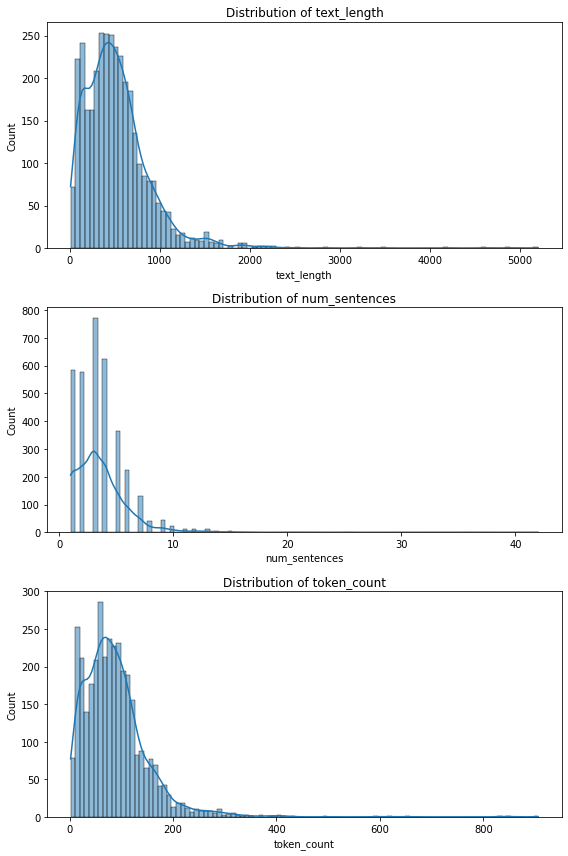

In [28]:
columns_to_plot = ['text_length', 'num_sentences', 'token_count']
    
plot_distribution(df=improved_data, columns=columns_to_plot)

The above plots shows that all 3 count distributions are not normal and has only upper bound outliers

We can start analyizin the outliers of these data to check what kind of text are present

In [29]:
from src.analysis.text import classify_outliers

In [30]:
featured_data = classify_outliers(df=improved_data, columns=columns_to_plot)

In [31]:
featured_data.sample(3)

,id,desc,text_length,num_sentences,token_count,text_length_outlier_bound,num_sentences_outlier_bound,token_count_outlier_bound
1725,5ebc0c77-e8e9-445c-ab6e-a4ac907c5c0d,Yes Health is an all-mobile diabetes preventio...,571,5,102,no_outlier,no_outlier,no_outlier
324,b6e43f14-67d3-413c-8599-8c586d9d022d,"Pongo empowers entrepreneurs to launch, operat...",103,1,20,no_outlier,no_outlier,no_outlier
399,eaa94714-aa91-49ee-bb0a-a1602d6f5290,Babyscripts three-tiered approach to virtual m...,1268,6,217,no_outlier,no_outlier,upper_bound


In [32]:
featured_data['token_count_outlier_bound'].value_counts()

no_outlier     3328
upper_bound     124
Name: token_count_outlier_bound, dtype: int64

In [33]:
featured_data['num_sentences_outlier_bound'].value_counts()

no_outlier     3370
upper_bound      82
Name: num_sentences_outlier_bound, dtype: int64

In [34]:
featured_data['text_length_outlier_bound'].value_counts()

no_outlier     3339
upper_bound     113
Name: text_length_outlier_bound, dtype: int64

#### Most frequent tokens

The analysis step of identifying the most frequent words is crucial in understanding the underlying patterns and themes within the dataset. By identifying the most frequent words, we gain valuable insights into the common topics, trends, and key features present in the data. This information helps in better understanding the nature of the dataset and provides a foundation for subsequent analysis and decision-making.

Lets analyse the most frequent tokens using spacy on our dataset

In [35]:
from src.analysis.text import calculate_most_frequent_tokens

In [36]:
min_spacy_model = get_spacy_model(new_model = True, disable=['parser', 'tagger','ner'])

In [37]:
min_spacy_model.max_length = int(2e6)

In [38]:
frequent_words = calculate_most_frequent_tokens(featured_data['desc'].tolist(), model=min_spacy_model)

C:\Users\mathe\anaconda3\lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 304201/304201 [00:00<00:00, 1130769.31it/s]


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List, Tuple

def plot_frequent_words(frequent_words: List[Tuple[str, int]]):
    """
    Plot a horizontal bar plot of the first 15 most frequent words.
    
    Args:
        frequent_words (List[Tuple[str, int]]): List of tuples containing the word and its frequency.
    """
    # Select the top 15 most frequent words
    top_words = frequent_words[:15]
    
    # Extract the words and frequencies into separate lists
    words = [word for word, _ in top_words]
    frequencies = [freq for _, freq in top_words]
    
    # Create a horizontal bar plot
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.barplot(x=frequencies, y=words, palette="viridis")
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.title("Top 15 Most Frequent Words")
    plt.show()

In [40]:
frequent_words[:10]

[('platform', 1734),
 ('data', 1729),
 ('company', 1607),
 ('technology', 943),
 ('based', 935),
 ('AI', 841),
 ('health', 837),
 ('solutions', 736),
 ('services', 723),
 ('healthcare', 719)]

Below we can see the most frequent words on our dataset

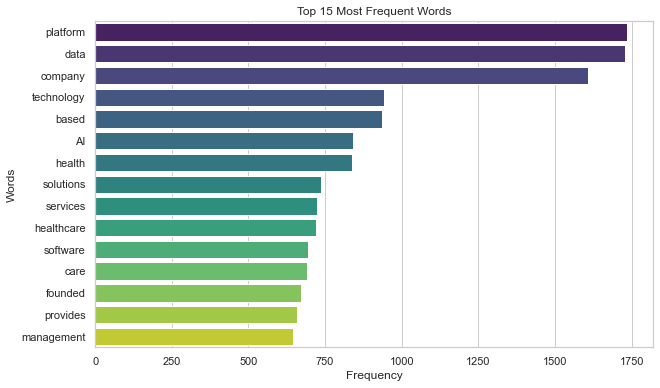

In [41]:
plot_frequent_words(frequent_words[:15])

The analysis of the most frequent words provides valuable insights into the dataset and sheds light on the key themes and topics present within the data. The top 10 most frequent words, namely 'platform', 'data', 'company', 'technology', 'based', 'AI', 'health', 'solutions', 'services', and 'healthcare', offer a glimpse into the dominant subjects and areas of focus.

The frequency of these words indicates their significance and prevalence within the dataset. 'Platform' and 'data' emerge as prominent terms, highlighting the importance of data-driven platforms in various industries. 'Company' underscores the focus on organizations and their operations. 'Technology' and 'AI' reflect the growing influence of advanced technologies, particularly artificial intelligence, in driving innovation and transformation.

The presence of terms like 'health', 'solutions', 'services', and 'healthcare' suggests a strong emphasis on the healthcare sector. This indicates a potential focus on leveraging technology and data-driven solutions to improve healthcare outcomes and services.

In [42]:
frequent_words[10:20]

[('software', 694),
 ('care', 691),
 ('founded', 671),
 ('provides', 657),
 ('management', 646),
 ('time', 614),
 ('companies', 588),
 ('digital', 560),
 ('customers', 541),
 ('business', 531)]

## Company Names 🔍

In the analysis of company descriptions, one crucial aspect is the extraction of the company names from the text. The name of a company serves as its unique identifier and plays a fundamental role in various business-related tasks. Extracting company names from text allows us to gain insights into the presence and prominence of different companies in the analyzed dataset. By identifying and extracting company names, we can perform more targeted analyses, such as tracking the market presence of specific companies


We will detects company names from the given dataframe's text column using spaCy's entity type, PoS, and dependency information.

In [103]:
from src.analysis.companies import detect_company_name

In [112]:
final_data = detect_company_name(df=featured_data, text_column='desc', nlp_model=get_spacy_model())

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3452/3452 [01:01<00:00, 56.34it/s]


In [116]:
final_data.sample(10)

,id,desc,text_length,num_sentences,token_count,text_length_outlier_bound,num_sentences_outlier_bound,token_count_outlier_bound,name
275,9be1466d-354b-40b3-a350-0beddd1167a5,Valimail is the global leader in zero-trust em...,566,3,100,no_outlier,no_outlier,no_outlier,Valimail
587,9894ab60-31e4-4975-88fb-8e0d29413baf,"Valo Health, LLC (Valo) is a technology compan...",668,3,116,no_outlier,no_outlier,no_outlier,Valo Health
2480,a2caa004-5387-4336-875a-69145436f12c,Certara is the global leader in biosimulation....,542,5,82,no_outlier,no_outlier,no_outlier,Certara
983,1c1424d9-02a0-47ff-ab90-68b9e6614e4b,LiveApp is a mobile marketing platform that sa...,345,2,57,no_outlier,no_outlier,no_outlier,LiveApp
2211,88d6d699-1d97-4de1-9bfc-3a86430f2554,"L1ght is an algorithm-driven innovator, design...",167,2,33,no_outlier,no_outlier,no_outlier,We
1557,4f85bbc4-c0f9-4adc-9fc3-cb749d32ea8a,Sendinblue is a developer of a cloud-based dig...,692,4,117,no_outlier,no_outlier,no_outlier,Sendinblue
837,0e9d90a9-6c51-4731-b8d8-71fbb929c92f,Colgate-Palmolive Company (Colgate) is a consu...,995,7,174,no_outlier,no_outlier,no_outlier,Colgate Company
2248,8ccca9dc-8466-4ada-891d-cf2225d9a9ac,Curai is a virtual care company that uses arti...,609,4,107,no_outlier,no_outlier,no_outlier,Curai
1095,25209e0e-dbb8-4b57-a7dd-c32189fdfd7b,"Qubitekk is a privately-held, California-locat...",337,2,55,no_outlier,no_outlier,no_outlier,Qubitekk
1375,3f6010a8-a28a-4d78-8002-196229377387,contextere is an industrial software company f...,359,4,52,no_outlier,no_outlier,no_outlier,Our


Analyzing the output we can see thats the algorithm can detect in most of the cases the name of the company, but it fails for others, mainly when the spacy algorithm fails to detect and the regex fallback solution comes in.

In [86]:
final_data.iloc[53].desc

'Suvodas sole focus is to offer the industrys leading SaaS solution for randomization and trial supply management. Suvodas Interactive Response Technology (IRT/IWRS) system combines the flexibility of a custom solution with the speed of a configurable platform, offering 4-week deployment, reimagined reporting, and easy integration.'

## Modeling

In the next notebook we will work on modeling.

In [118]:
final_data.to_csv(os.path.join(DATA_BASE_PATH, 'curated', 'featured.csv'), index=False)